In [1]:
#Cada columna representa un regundo de actividad del paciente.
#Cada fila representa un paciente diferente.
#La columna y es la categoria a la cual pertenece el paciente
#    5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open 
#    4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed 
#    3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area 
#    2 - They recorder the EEG from the area where the tumor was located 
#    1 - Recording of seizure activity 
#De la categoria de 2-5 son pacientes que no sufren de epilepsia, y la 1 si. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import itertools
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/opt/miniconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .linbin import fast_linbin
/opt/miniconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:26: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from .linbin import fast_linbin
/opt/miniconda/lib/python2.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:11: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._smoothers_lowess import lowess as _lowess
/opt/miniconda/lib/python2.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:11: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from ._smoothers_lowess import lowess as _lowess
/opt/miniconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: D

In [3]:
data = pd.read_csv("Data/data.csv")
del data["Unnamed: 0"]#borrando primera columna, correspondiente a la identificacion del paciente

In [4]:
np.sum(np.sum(data.isna())) # checking for nan values

0

In [5]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt


In [7]:
X = data
y = data["y"]

In [44]:
def logisticRegression(X, y):
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.5)
    clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    plot_learning_curve(clf, "Learning Curve", X, y)
    print "Logistic regression reports:\n", classification_report(yts, predicts)
    print "Logistic regression accuracy:", acc
    return confusion_matrix(yts, predicts)

Logistic regression reports:
             precision    recall  f1-score   support

          1       0.75      0.35      0.48      1148
          2       0.13      0.02      0.04      1154
          3       0.08      0.02      0.03      1147
          4       0.21      0.23      0.22      1156
          5       0.28      0.84      0.42      1145

avg / total       0.29      0.29      0.24      5750

Logistic regression accuracy: 0.29234782608695653


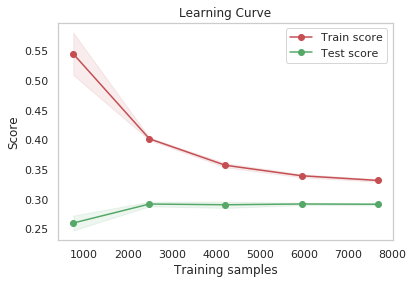

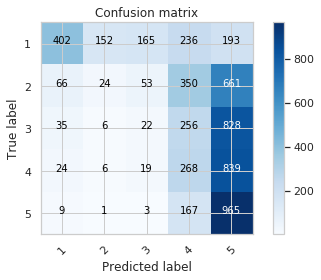

In [45]:
conf_matrix = logisticRegression(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

In [23]:
def svm(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = SVC(kernel="poly", degree=2, gamma = 150)
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    plot_learning_curve(clf, "Learning Curve", X, y)
    print "SVM reports:\n", classification_report(yts, predicts)
    print "SVM accuracy:", acc
    return confusion_matrix(yts, predicts)

calculating...
SVM reports:
             precision    recall  f1-score   support

          1       0.95      0.46      0.62       670
          2       0.31      0.48      0.38       687
          3       0.32      0.52      0.39       704
          4       0.44      0.27      0.33       709
          5       0.28      0.20      0.23       680

avg / total       0.46      0.39      0.39      3450

SVM accuracy: 0.3855072463768116


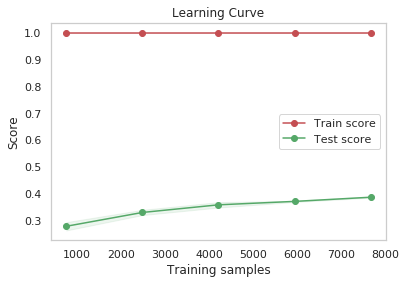

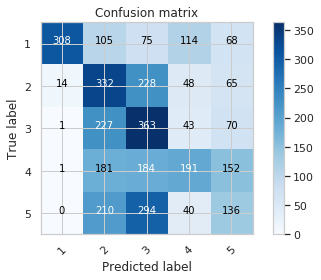

In [24]:
conf_matrix = svm(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

In [15]:
def changeValuesRandomForest(X, y):
    print "guess im doing something"
    plt.figure()
    max_depths = range(1, 25)
    predicts = np.array([cross_val_score(RandomForestClassifier(max_depth=i), X, y, cv=10) for i in max_depths])
    plt.plot(max_depths, predicts[:,0], "o-", color="green", label="Test")
    plt.grid()
    #plt.fill_between(max_depths, predicts[:,0]-predicts[:,1], predicts[:,0]+predicts[:,1], color="green", alpha=.2)
    plt.xlabel("Random Forest max depth")
    plt.ylabel("Accuracy")


In [16]:
def randomForest(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = RandomForestClassifier(max_depth=25)
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    plot_learning_curve(clf, "Learning Curve", X, y)
    print "Random Forest reports:\n", classification_report(yts, predicts)
    print "Random Forest accuracy:", acc
    return confusion_matrix(yts, predicts)

calculating...
Random Forest reports:
             precision    recall  f1-score   support

          1       0.94      0.97      0.96       707
          2       0.93      0.92      0.92       666
          3       0.94      0.93      0.94       689
          4       0.97      0.96      0.97       699
          5       1.00      1.00      1.00       689

avg / total       0.96      0.96      0.96      3450

Random Forest accuracy: 0.9568115942028985


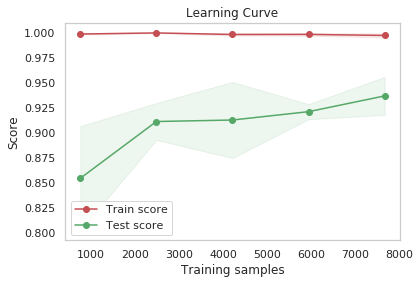

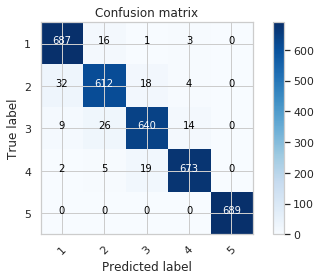

In [14]:
conf_matrix = randomForest(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

guess im doing something


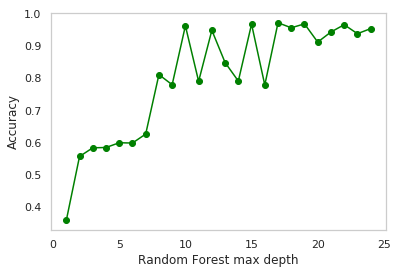

In [17]:
changeValuesRandomForest(X, y)
plt.show()

In [39]:
def decisionTree(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = DecisionTreeClassifier(max_depth=4);
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    plot_learning_curve(clf, "Learning Curve", X, y)
    print "Decision tree reports:\n", classification_report(yts, predicts)
    print "Decision tree accuracy:", acc
    return confusion_matrix(yts, predicts)

In [ ]:
conf_matrix = decisionTree(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

In [29]:
def knn(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = KNeighborsClassifier(n_neighbors=7);
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    plot_learning_curve(clf, "Learning Curve", X, y)
    print "KNN reports:\n", classification_report(yts, predicts)
    print "KNN accuracy:", acc
    return confusion_matrix(yts, predicts)

calculating...
KNN reports:
             precision    recall  f1-score   support

          1       0.99      0.67      0.80       646
          2       0.33      0.60      0.42       687
          3       0.33      0.59      0.42       720
          4       0.91      0.24      0.38       731
          5       0.22      0.08      0.12       666

avg / total       0.55      0.43      0.42      3450

KNN accuracy: 0.4339130434782609


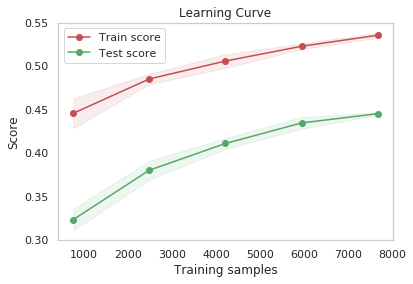

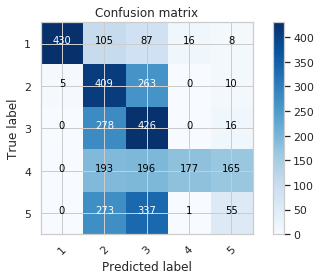

In [30]:
conf_matrix = knn(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()